In [1]:
import f110_gym
import f110_orl_dataset
import gymnasium as gym
# import gymnasium as gym

In [2]:
import importlib
# reimport f110_or_dataset
import gymnasium as gym
importlib.reload(gym)
importlib.reload(f110_orl_dataset)

/home/fabian/miniconda3/envs/f110_sb3/lib/python3.8/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment f110_with_dataset-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'f110_orl_dataset' from '/home/fabian/f110_rl/f110-sb3/f1tenth_orl_dataset/f110_orl_dataset/__init__.py'>

In [3]:
F110Env = gym.make('f110_with_dataset-v0',
    # only terminals are available as of tight now 
        **dict(name='f110_with_dataset-v0',
            config = dict(map="Infsaal", num_agents=1),
              render_mode="human")
    )     

/home/fabian/f110_rl/f110-sb3/f1tenth_gym/gym/f110_gym/envs/integrator.py:13: UserWarning: Chosen integrator is RK4. This is different from previous versions of the gym.
  warnings.warn(


{'config': {'map': 'Infsaal', 'num_agents': 1}, 'render_mode': 'human'}
Infsaal_map.pgm


Infsaal_map.pgm
hi
Infsaal_map.pgm
Infsaal_map.pgm
===
Box([[-0.4189 -5.    ]], [[ 0.4189 20.    ]], (1, 2), float32)
low
20
Box([-30.        -30.         -6.2831855 -20.        -20.        -20.
  -0.4189      0.7         0.       ], [30.        30.         6.2831855 20.        20.        20.
  0.4189     2.         1.       ], (9,), float32)
***********


/home/fabian/miniconda3/envs/f110_sb3/lib/python3.8/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [9]:
root = F110Env.get_dataset(zarr_path=/home/fabian/f110_rl/f110-sb3/evaluation_ds.zarr,
                           # "/home/fabian/f110_rl/f110-sb3/trajectories4.zarr",
                            skip_inital=0,
                            split_trajectories=0,
                            alternate_reward=True,
                            remove_short_trajectories=True)
print(root["observations"].shape)


/home/fabian/f110_rl/f110-sb3/trajectories4.zarr
['det' 'min_acti' 'min_lida' 'raceline' 'steering' 'td_progr' 'vel_chan'
 'velocity']
len(model_names) 352236
Indices: 352236
Using alternate reward
ang_vels_z
lidar_occupancy
linear_vels_x
linear_vels_y
poses_theta
poses_x
poses_y
previous_action
progress
(352236, 9)


In [10]:
print(root["rewards"].shape)

(352236,)


In [19]:
print(max(root["observations"][:,0]))
print(min(root["observations"][:,0]))

print(max(root["observations"][:,1]))
print(min(root["observations"][:,1]))

print(root["observations"][0,0])
print(root["observations"][0,1])

2.579379081726074
-4.642085552215576
9.015541076660156
-1.4152933359146118
-0.7099139094352722
0.03920105844736099


In [29]:
import matplotlib.pyplot as plt

In [30]:
root.keys()

dict_keys(['rewards', 'terminals', 'timeouts', 'actions', 'log_probs', 'index', 'observations', 'infos'])

In [31]:
root_obs = F110Env.unflatten_batch(root["observations"])

In [32]:
print(root_obs["previous_action"].shape)

(258800, 1, 2)


In [33]:
import numpy as np

In [34]:
print(np.sum(root["terminals"]))

5176


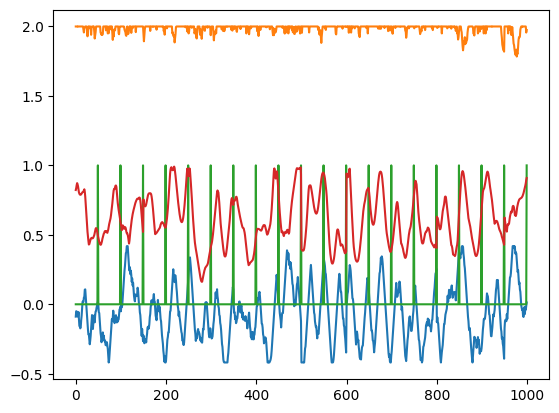

In [35]:
plt.plot(root_obs["previous_action"][:,0,:][:1000])
plt.plot(root["terminals"][:1000])
plt.plot(root["rewards"][:1000])

50
50
[5175]
[50]


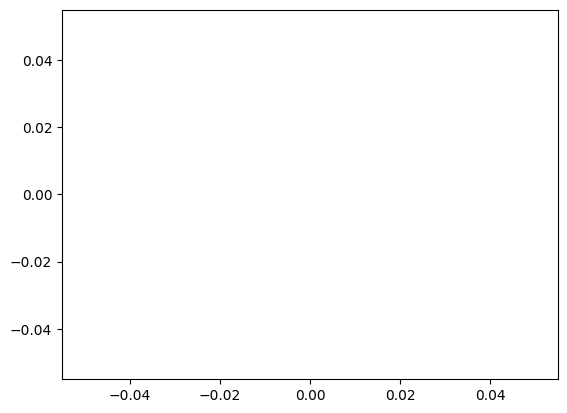

In [36]:
print(max(np.diff(np.where(root["terminals"])[0])))
print(min(np.diff(np.where(root["terminals"])[0])))
# print plot with counts of np.diff(np.where(root["terminals"])[0]))
uniques, counts = np.unique(np.diff(np.where(root["terminals"])[0]), return_counts=True)
plt.bar(uniques[:len(uniques)-1], counts[:len(uniques)-1])
print(counts)
print(uniques)

In [37]:
import numpy as np

In [38]:
model_names = root["infos"]["model_name"]
def get_change_indices(model_names):
    change_indices = []
    current_name = model_names[0]
    for idx, name in enumerate(model_names):
        if name != current_name:
            change_indices.append(idx)
            current_name = name
    return change_indices
change_indices = get_change_indices(model_names) + [len(model_names)]
print(change_indices)
model_names_ = [model_names[i-1] for i in change_indices]
print(change_indices[0],np.diff(change_indices))
print(model_names_)

[26400, 68050, 109800, 136350, 177600, 216550, 258800]
26400 [41650 41750 26550 41250 38950 42250]
['velocity', 'raceline', 'min_lida', 'td_progr', 'steering', 'min_acti', 'vel_chan']


In [39]:
poses_x = root_obs['poses_x'].squeeze(1)
poses_y = root_obs['poses_y'].squeeze(1)

In [40]:
print(poses_x.shape)

(258800,)


In [41]:
def plot_heatmap(start_idx, end_idx):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]

    # Create a 2D histogram (heatmap)
    plt.hist2d(x_data, y_data, bins=(100, 100), cmap=plt.cm.jet, range=[[-5, 2.5], [-1.5, 9]])
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Heatmap for model: {model_names[start_idx]}')
    # plt size y from 0 to 0.4
    plt.show()


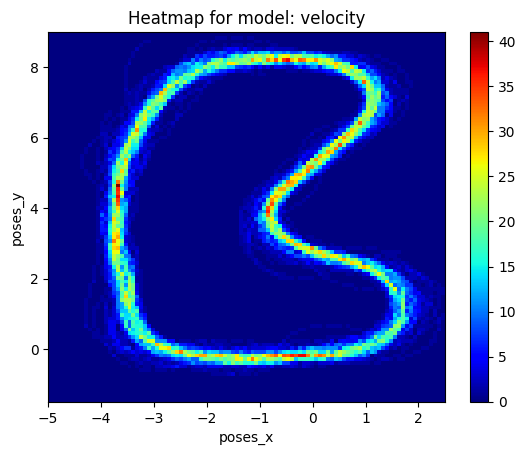

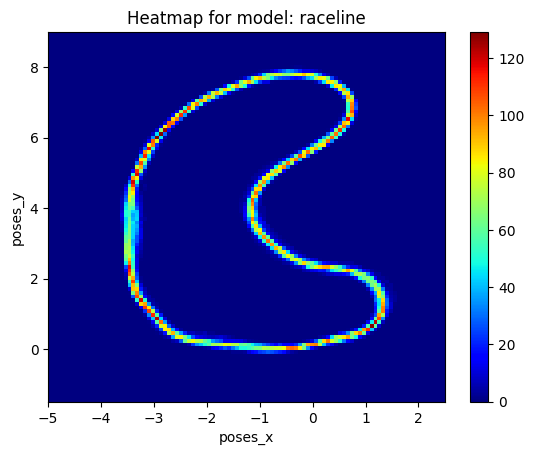

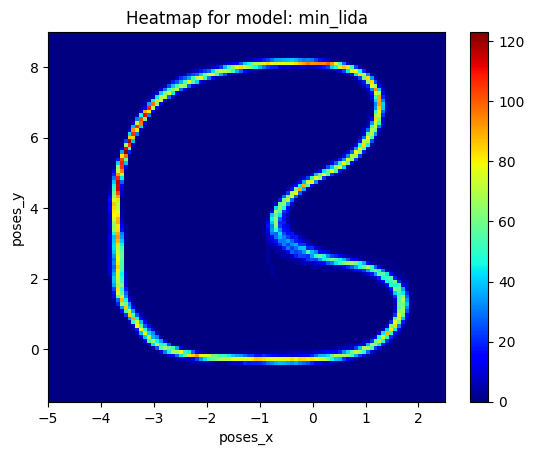

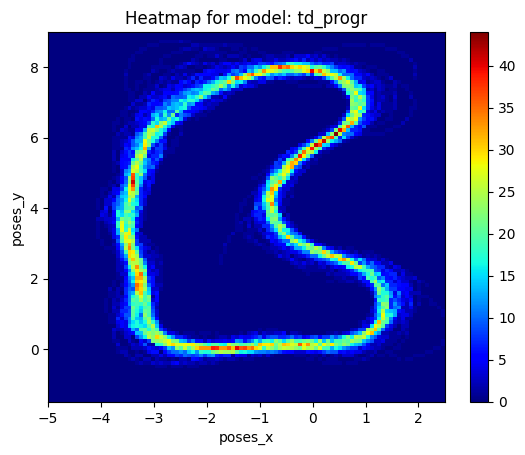

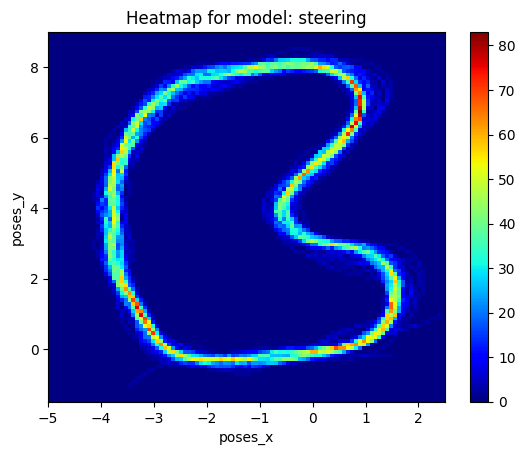

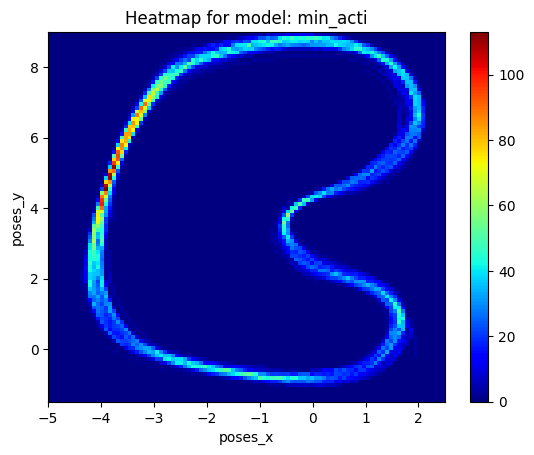

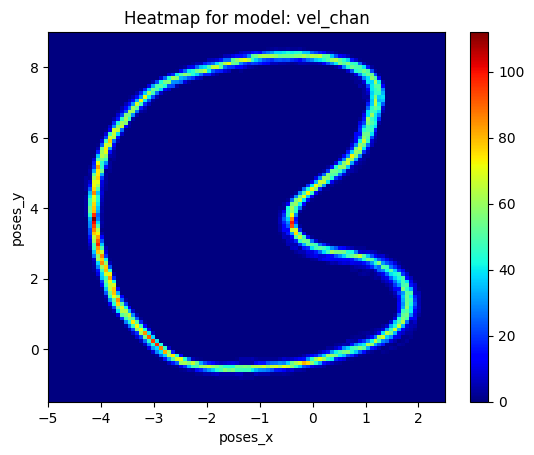

In [42]:
# Now, let's plot for each segment
start_idx = 0
for end_idx in change_indices:
    plot_heatmap(start_idx, end_idx)
    start_idx = end_idx

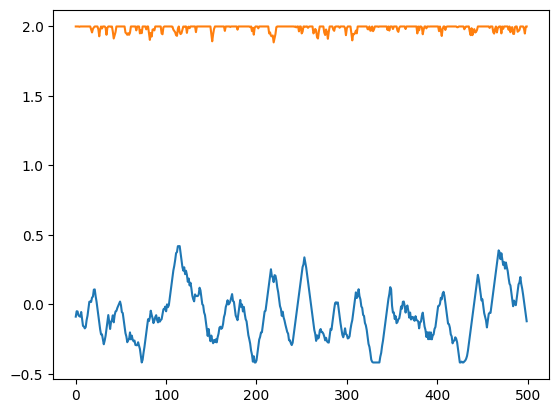

In [43]:
plt.plot(root_obs["previous_action"][:,0,:][:500])

In [44]:
# for each model the number of ored dones and truncates
print("Number of ores done and truncates for each model:")
done = root['terminals']
truncated = root['timeouts']
done_or_truncated = np.logical_or(done, truncated)
start_idx = 0
# print("Discounted TD Reward")
#model_names_ = []
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    #model_names_.append(model_names[start_idx])
    num_done_or_truncated = np.sum(done_or_truncated[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_done_or_truncated}')
    start_idx = change_idx

Number of ores done and truncates for each model:
velocity: 528
raceline: 833
min_lida: 835
td_progr: 531
steering: 825
min_acti: 779
vel_chan: 845


In [45]:
print(root.keys())

dict_keys(['rewards', 'terminals', 'timeouts', 'actions', 'log_probs', 'index', 'observations', 'infos'])


In [46]:
import matplotlib.pyplot as plt
import numpy as np

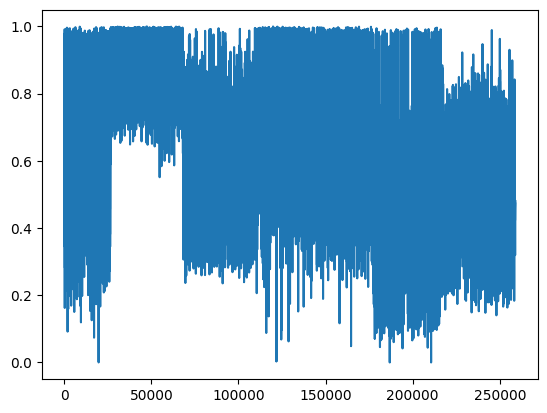

In [47]:

plt.plot(root["rewards"])
plt.show()

In [48]:
def compute_returns(input):
    discount = 0.99
    discounted_returns = []
    for episode in tr:
        discounted_return = 0
        # with numpy
        discounted_return = np.sum(discount**np.arange(len(input["rewards"])) * input["rewards"])
        discounted_returns.append(discounted_return)
    return discounted_returns

In [49]:
def calculate_discounted_reward(rewards, done, truncated, gamma=0.99):
    # combine done and truncated
    done_or_truncated = np.logical_or(done, truncated)
    # split into segments at done or truncated
    change_indices = np.where(done_or_truncated)[0] + 1 # catch the last segment
    # ensure that we dont access out of bounds, by checking if we are at the end
    change_indices[-1] = min(change_indices[-1], len(rewards)-1)
    # calculate discounted reward for each segment
    start_idx = 0
    discounted_rewards = []
    for end_idx in change_indices:
        segment_rewards = rewards[start_idx:end_idx][30:]
        #print(len(segment_rewards))
        discounted_reward = np.sum(segment_rewards * gamma ** np.arange(len(segment_rewards)))
        # print(f'Discounted reward: {discounted_reward}')
        discounted_rewards.append(discounted_reward)
        start_idx = end_idx
    return np.mean(discounted_rewards), np.std(discounted_rewards)

In [69]:
# for each model calculate the mean discounted reward
start_idx = 0
print("Discounted TD Reward")
gamma = 0.9
means = []
stds = []
# model_names_.append(model_names[start_idx])
for idx, change_idx in enumerate(change_indices): # this is for each model
    # count number of collisions for this model
    try:
        mean_discounted_reward, std_discounted = calculate_discounted_reward(root['rewards'][start_idx:change_idx],
                                    root['terminals'][start_idx:change_idx],
                                    root['timeouts'][start_idx:change_idx], gamma=gamma)
        print(f'{model_names[start_idx]}: {mean_discounted_reward} +- {std_discounted} ({mean_discounted_reward* (1-gamma)} +- {std_discounted * (1-gamma)})')
        means.append(mean_discounted_reward)
        stds.append(std_discounted)
        start_idx = change_idx
    except:
        print(0)
        

Discounted TD Reward
velocity: 5.579281442360253 +- 1.2684843976804097 (0.5579281442360252 +- 0.12684843976804094)
raceline: 7.79029719373776 +- 0.5974691094026182 (0.7790297193737759 +- 0.059746910940261806)
min_lida: 5.530935697129302 +- 1.2102725528109708 (0.5530935697129301 +- 0.12102725528109705)
td_progr: 6.857739217606864 +- 1.2092409296670823 (0.6857739217606862 +- 0.1209240929667082)
steering: 5.806382894563343 +- 1.4694636158398777 (0.5806382894563341 +- 0.14694636158398774)
min_acti: 3.5316967492895 +- 1.7528632910807154 (0.3531696749289499 +- 0.1752863291080715)
vel_chan: 4.473646143013261 +- 1.233784571278559 (0.447364614301326 +- 0.12337845712785586)


In [70]:
print(model_names_)

['velocity', 'raceline', 'min_lida', 'td_progr', 'steering', 'min_acti', 'vel_chan']


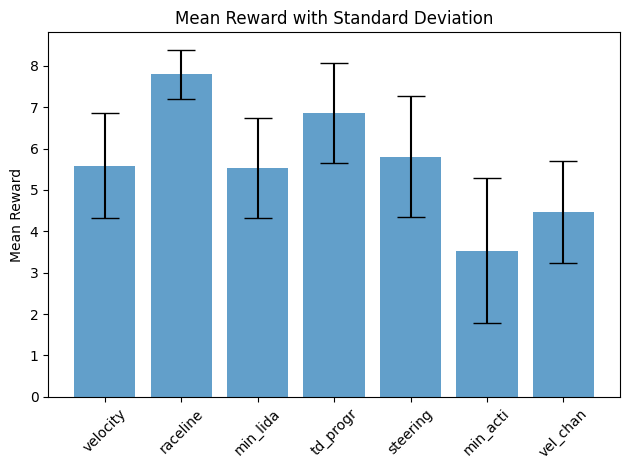

In [71]:
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Mean Reward with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

In [72]:
def compute_trajectory_lengths(done, truncated):
    done_or_truncated = np.logical_or(done, truncated)
    # Add an ending point to ensure the last trajectory is considered
    # done_or_truncated = np.append(done_or_truncated, [1])
    lengths = []
    count = 0
    for flag in done_or_truncated:
        if flag:
            lengths.append(count + 1)
            count = 0
        else:
            count += 1
    return lengths

Statistics for each model:
velocity:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 26400

raceline:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 41650

min_lida:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 41750

td_progr:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 26550

steering:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 41250

min_acti:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 38950

vel_chan:
	Mean Length: 50.0
	Standard Deviation: 0.0
	Min Length: 50
	Max Length: 50

	Total Length: 42250

7
7
7


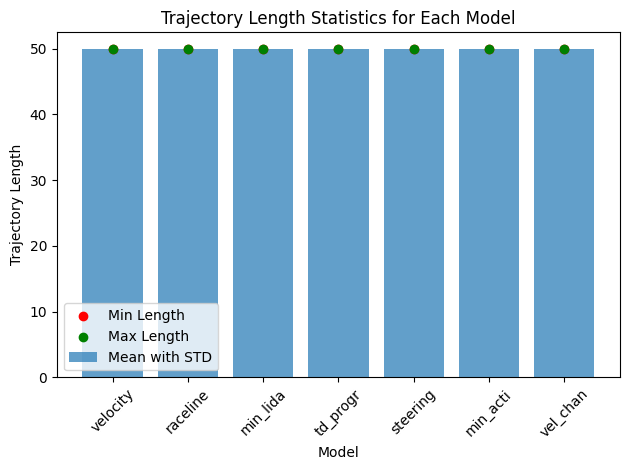

In [54]:
done = root['terminals']
truncated = root['timeouts']

start_idx = 0

# Lists for plotting
means = []
std_devs = []
mins = []
maxs = []

print("Statistics for each model:")
for idx, change_idx in enumerate(change_indices):
    current_lengths = compute_trajectory_lengths(done[start_idx:change_idx], truncated[start_idx:change_idx])

    mean_length = np.mean(current_lengths)
    std_dev = np.std(current_lengths)
    min_length = np.min(current_lengths)
    max_length = np.max(current_lengths)
    total_length = np.sum(current_lengths)
    print(f"{model_names[start_idx]}:")
    print(f"\tMean Length: {mean_length}")
    print(f"\tStandard Deviation: {std_dev}")
    print(f"\tMin Length: {min_length}")
    print(f"\tMax Length: {max_length}\n")
    print(f"\tTotal Length: {total_length}\n")
    # Add values to lists for plotting
    means.append(mean_length)
    std_devs.append(std_dev)
    mins.append(min_length)
    maxs.append(max_length)

    start_idx = change_idx

# Plotting
x = np.arange(len(np.unique(model_names)))
print(len(means))
print(len(std_devs))
print(len(x))
plt.bar(x, means, yerr=std_devs, label='Mean with STD', alpha=0.7)
plt.scatter(x, mins, color='red', label='Min Length', zorder=3)
plt.scatter(x, maxs, color='green', label='Max Length', zorder=3)

plt.xlabel('Model')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length Statistics for Each Model')
plt.xticks(x, model_names_, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

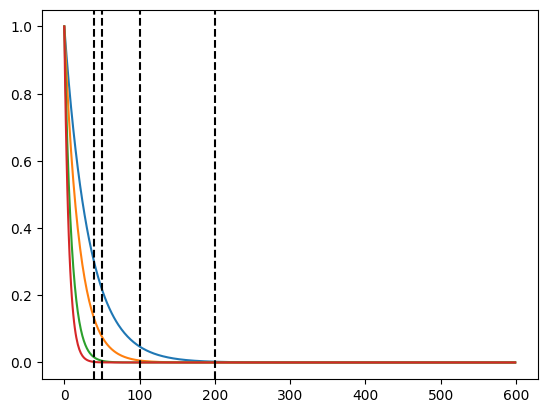

In [59]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(0.97 ** np.arange(600))
plt.plot(0.95 ** np.arange(600))
plt.plot(0.9 ** np.arange(600))
plt.plot(0.85 ** np.arange(600))
# plot vertical lines as 50, 100 , 200
plt.axvline(x=40, color='k', linestyle='--')
plt.axvline(x=50, color='k', linestyle='--')
plt.axvline(x=100, color='k', linestyle='--')
plt.axvline(x=200, color='k', linestyle='--')
# plt.plot(0.99 ** np.arange(1000))

In [55]:
print(root["observations"].shape)

(258800, 9)


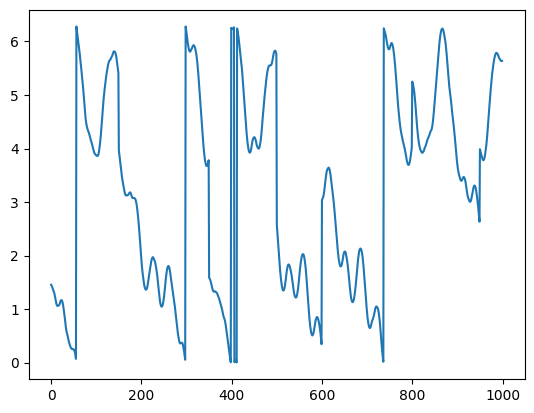

In [56]:
plt.plot(root["observations"][:1000,2])
plt.show()

In [41]:
print(max(rew))
new = np.array([0.25] * len(rew))
print(compute_returns(new))

0.0029626671180267294
[24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.66130928068365

In [30]:
print(discounted_returns)
print(max(discounted_returns))
# get argmax
print(np.argmax(discounted_returns))

[0.22419001889782492, 0.2291014891632704, 0.22758558787760497, 0.2284173734873712, 0.2183412345028362, 0.21978473976496313, 0.22320209044479186, 0.2285211108079324, 0.2317357281157974, 0.22622165801609218, 0.22689239671125794, 0.22982876556357756, 0.22729069805716126, 0.22354296990281103, 0.23168873999838077, 0.22733039864964572, 0.23253886185382017, 0.2254798480090844, 0.22970073358748574, 0.22454940092929299, 0.23083942500687551, 0.23763101238456397, 0.23058275444134993, 0.22671012368892896, 0.22759151356262378, 0.23260185810091158, 0.22936873480812486, 0.22509136902697388, 0.22994225734100077, 0.23273171021031197, 0.23290557102899098, 0.22886693703089184, 0.22924247885298507, 0.2264710881794249, 0.2243375559266521, 0.22987019727607622, 0.22194722562799096, 0.23116192719120532, 0.228334902824646, 0.22790574039458725, 0.23020537830449625, 0.231006450374601, 0.2322731066201018, 0.22772761019037313, 0.2310035220122918, 0.2315576326943134, 0.21978619895332407, 0.23338387301045205, 0.2187

In [15]:
# print mean and variance of discounted returns
print("mean and variance of discounted returns")
print(np.mean(discounted_returns))
print(np.var(discounted_returns))

mean and variance of discounted returns
21.138507718097383
1.9556561830439847


In [10]:
plt.plot(tr["rewards"])

TypeError: list indices must be integers or slices, not str

In [13]:
tr[0]["observations"].shape

(6, 435)

In [5]:
from f110_gym.envs.laser_models import ScanSimulator2D, check_ttc_jit, ray_cast

In [11]:
import numpy as np

In [25]:
# state is [x, y, steer_angle, vel, yaw_angle, yaw_rate, slip_angle]
state = np.array([[1.2, 5.0, 0.0, 0.0, 1.0, 0.0], [1.2, 5.0, 0.0, 0.0, 1.0, 0.0]])
scan = F110Env.sim.agents[0].scan_simulator.scan(np.array([1.2,5.0,1.0]),None)

In [57]:
print(tr["observations"][0:10].shape)
print(tr["obs_keys"][0:6])
print(tr["observations"].shape)
print(tr["observations"][1])
xy = tr["observations"][0:10, -2:]#[-2:]
print(xy)
theta = tr["observations"][0:10,-3]
# add dimension -1 to theta
theta = np.expand_dims(theta, axis=-1)
print(theta)
print(theta.shape)
print(xy.shape)
joined = np.hstack((xy, theta))
print(joined)

(10, 6)
['ang_vels_z' 'linear_vel_x' 'linear_vel_y' 'pose_theta' 'pose_x' 'pose_y']
(40895, 6)
[0.06851754 0.17578745 0.         1.00095689 1.20233607 5.00364065]
[[1.20001781 5.00002766]
 [1.20233607 5.00364065]
 [1.20988345 5.0155282 ]
 [1.22125268 5.0340395 ]
 [1.23421669 5.05907965]
 [1.24877167 5.08976269]
 [1.26334405 5.12578487]
 [1.27552319 5.16462326]
 [1.28915    5.20561981]
 [1.3053534  5.24621058]]
[[1.        ]
 [1.00095689]
 [1.01040018]
 [1.02811468]
 [1.04041481]
 [1.05728149]
 [1.08621335]
 [1.12724793]
 [1.15346038]
 [1.1592865 ]]
(10, 1)
(10, 2)
[[1.20001781 5.00002766 1.        ]
 [1.20233607 5.00364065 1.00095689]
 [1.20988345 5.0155282  1.01040018]
 [1.22125268 5.0340395  1.02811468]
 [1.23421669 5.05907965 1.04041481]
 [1.24877167 5.08976269 1.05728149]
 [1.26334405 5.12578487 1.08621335]
 [1.27552319 5.16462326 1.12724793]
 [1.28915    5.20561981 1.15346038]
 [1.3053534  5.24621058 1.1592865 ]]


(1080,)


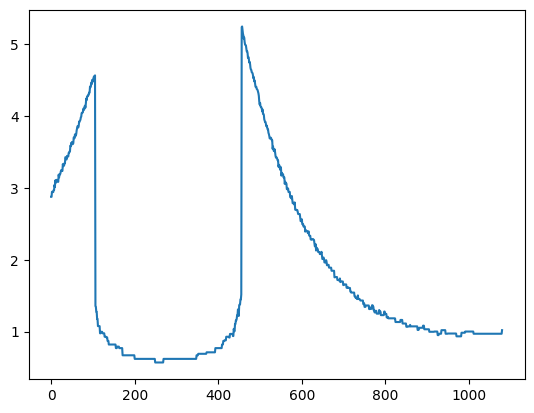

(1080,)


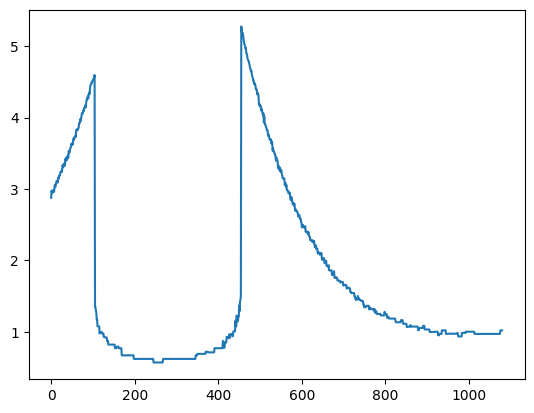

(1080,)


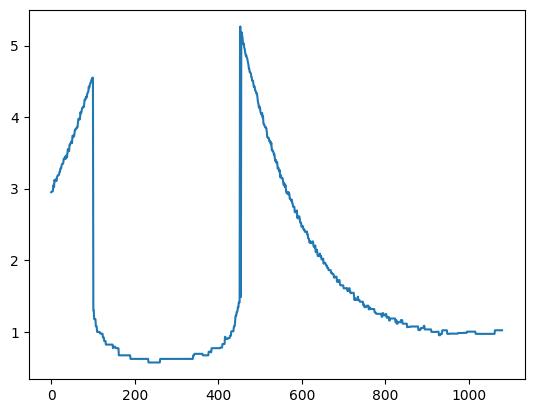

(1080,)


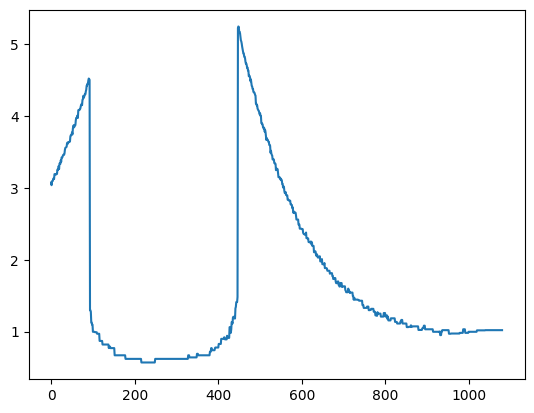

(1080,)


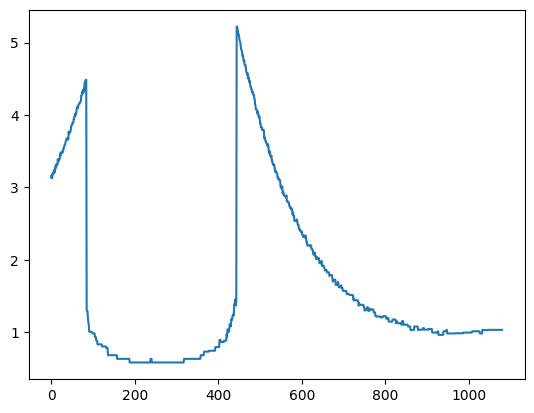

(1080,)


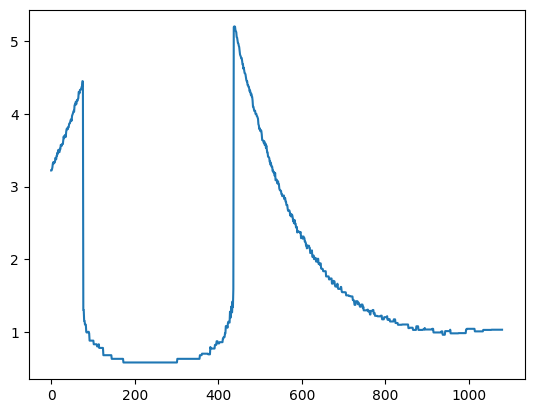

(1080,)


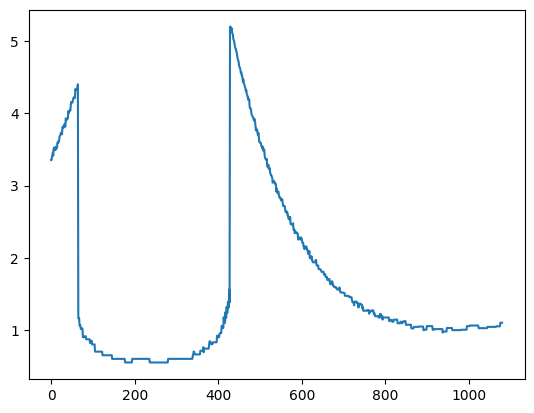

(1080,)


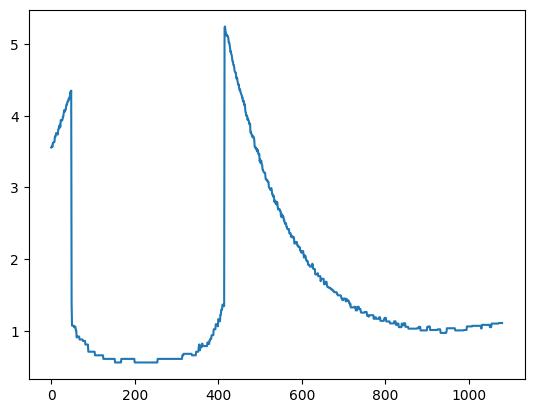

(1080,)


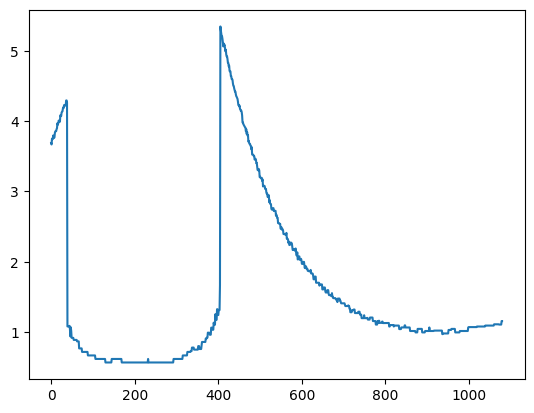

(1080,)


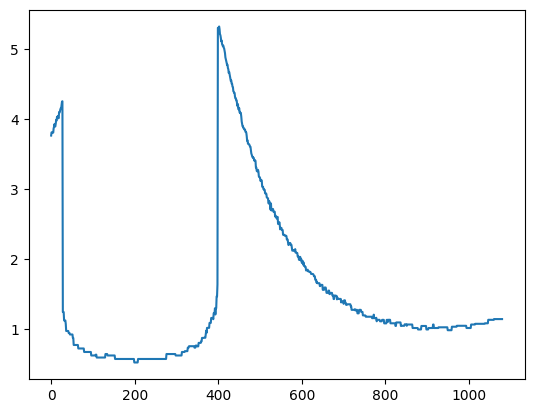

In [64]:
for pose in joined:
    scan = F110Env.sim.agents[0].scan_simulator.scan(pose,None)
    # TODO! downsample scan
    print(scan.shape)
    plt.plot(scan)
    plt.show()

In [42]:
print(joined)

[1.20233607 5.00364065 1.00095689]


In [21]:
import matplotlib.pyplot as plt

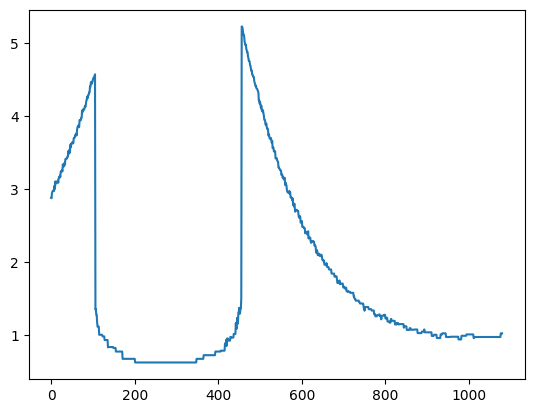

In [22]:
plt.plot(scan)